# Exercise 1
```In this exercise you will experience with pandas, matplotlib and numpy. This are main tools we are going to use later in course, and which are extremly useful in a variety of tasks. For each question, answer it in cells directly beneath it.```

```You are more than encourged to read relevant parts, mainly from ``` [pandas' API](https://pandas.pydata.org/pandas-docs/stable/reference/index.html)

```~ Ittai Haran```

## DataFrame basics

```A few of the fundamental routines for selecting, sorting, adding and aggregating data in DataFrames```

```import numpy and pandas```

In [0]:
import pandas as pd
import numpy as np

```Consider the following Python dictionary `data` and Python list `labels`:```

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```

```Create a DataFrame `df` from this dictionary `data` which has the index `labels`.```

In [0]:
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

In [0]:
df  = pd.DataFrame(data, labels)

```Display a summary of the basic information about this DataFrame and its data using the decribe and the info functions```

In [0]:
df.describe


<bound method DataFrame.describe of    age animal priority  visits
a  2.5    cat      yes       1
b  3.0    cat      yes       3
c  0.5  snake       no       2
d  NaN    dog      yes       3
e  5.0    dog       no       2
f  2.0    cat       no       3
g  4.5  snake       no       1
h  NaN    cat      yes       1
i  7.0    dog       no       2
j  3.0    dog       no       1>

In [0]:
df.info

<bound method DataFrame.info of    age animal priority  visits
a  2.5    cat      yes       1
b  3.0    cat      yes       3
c  0.5  snake       no       2
d  NaN    dog      yes       3
e  5.0    dog       no       2
f  2.0    cat       no       3
g  4.5  snake       no       1
h  NaN    cat      yes       1
i  7.0    dog       no       2
j  3.0    dog       no       1>

```Return the first 3 rows of the DataFrame `df`. Do it two times: use head and iloc```

In [0]:
df.head(3)


,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
c,0.5,snake,no,2


In [0]:
df.iloc[[0,1,2]]

,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
c,0.5,snake,no,2


```Select just the 'animal' and 'age' columns from the DataFrame `df`.```

In [0]:
df.loc[:,['animal', 'age']]

,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


```Select the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']`.```

In [0]:
df.iloc[[3,4,8],[0,1]]

,age,animal
d,NaN,dog
e,5.0,dog
i,7.0,dog


```Select only the rows where the number of visits is greater than 3. Pandas supports two useful APIs:
(df[boolean list/series]) returns the rows for which the value is True
(df[column] > num) returns a boolean series```

In [0]:
df.query('visits > 3')

,age,animal,priority,visits


```Select the rows where the age is missing, i.e. is `NaN`.```

In [0]:
df[np.isnan(df['age'])]

,age,animal,priority,visits
d,NaN,dog,yes,3
h,NaN,cat,yes,1


```Select the rows where the animal is a cat *and* the age is less than 3. You can use logical operands: &, |, ~```

In [0]:
cat = 'cat'
df.query('animal == @cat & age < 3')

,age,animal,priority,visits
a,2.5,cat,yes,1
f,2.0,cat,no,3


```Select the rows the age is between 2 and 4 (inclusive).```

In [0]:
df.query('age <= 4 & age >= 2')

,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
f,2.0,cat,no,3
j,3.0,dog,no,1


```Change the age in row 'f' to 1.5.```

In [0]:
df.at['f', 'age'] = 1.5


```Calculate the sum of all visits (the total number of visits). Do it twice: using built in pandas functions and using numpy```

In [0]:
df['visits'].sum()

19

In [0]:
np.sum(df['visits'])

19

```Calculate the mean age for each different animal in `df`.```

In [0]:
means={}
for animal in df['animal'].drop_duplicates():
    means[animal] = df['age'][df['animal'] == animal].mean()
print(means)

{'dog': 5.0, 'snake': 2.5, 'cat': 2.3333333333333335}


```Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.```

In [0]:
df = df.append(pd.Series(data={'age': 4, 'animal': 'dog', 'priority': 'no', 'visits':3}, name='k'))
print(df)

   age animal priority  visits
a  2.5    cat      yes       1
b  3.0    cat      yes       3
c  0.5  snake       no       2
d  NaN    dog      yes       3
e  5.0    dog       no       2
f  1.5    cat       no       3
g  4.5  snake       no       1
h  NaN    cat      yes       1
i  7.0    dog       no       2
j  3.0    dog       no       1
k  4.0    dog       no       3


In [0]:
df.drop(df.tail(1).index, inplace=True)
print(df)

   age animal priority  visits
a  2.5    cat      yes       1
b  3.0    cat      yes       3
c  0.5  snake       no       2
d  NaN    dog      yes       3
e  5.0    dog       no       2
f  1.5    cat       no       3
g  4.5  snake       no       1
h  NaN    cat      yes       1
i  7.0    dog       no       2
j  3.0    dog       no       1


```Count the number of each type of animal in `df`.```

In [0]:
nums={}
for animal in df['animal'].drop_duplicates():
    nums[animal] = 0
for animal in df['animal']:
    nums[animal] += 1 
print(nums)

{'dog': 4, 'snake': 2, 'cat': 4}


```Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visit' column in *ascending* order. You can use the sort_values function```

In [0]:
df.sort_values(by=['age'], ascending = False)

,age,animal,priority,visits
i,7.0,dog,no,2
e,5.0,dog,no,2
g,4.5,snake,no,1
b,3.0,cat,yes,3
j,3.0,dog,no,1
a,2.5,cat,yes,1
f,1.5,cat,no,3
c,0.5,snake,no,2
d,NaN,dog,yes,3
h,NaN,cat,yes,1


In [0]:
df.sort_values(by=['visits'])

,age,animal,priority,visits
a,2.5,cat,yes,1
g,4.5,snake,no,1
h,NaN,cat,yes,1
j,3.0,dog,no,1
c,0.5,snake,no,2
e,5.0,dog,no,2
i,7.0,dog,no,2
b,3.0,cat,yes,3
d,NaN,dog,yes,3
f,1.5,cat,no,3


```The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.```

In [0]:
df['priority'] = df['priority'].map({'yes' : True, 'no' : False})
df

,age,animal,priority,visits
a,2.5,cat,True,1
b,3.0,cat,True,3
c,0.5,snake,False,2
d,NaN,dog,True,3
e,5.0,dog,False,2
f,1.5,cat,False,3
g,4.5,snake,False,1
h,NaN,cat,True,1
i,7.0,dog,False,2
j,3.0,dog,False,1


```In the 'animal' column, change the 'snake' entries to 'python'.```

In [0]:
animals = df['animal']
for i in range(len(animals)):
  if animals[i] is 'snake':
      animals[i] = 'python'
df['animal'] = animals
df


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,age,animal,priority,visits
a,2.5,cat,True,1
b,3.0,cat,True,3
c,0.5,python,False,2
d,NaN,dog,True,3
e,5.0,dog,False,2
f,1.5,cat,False,3
g,4.5,python,False,1
h,NaN,cat,True,1
i,7.0,dog,False,2
j,3.0,dog,False,1


```For each animal type and each number of visits, find the mean age. In other words, each row is an animal, each column is a number of visits and the values are the mean ages (hint: use a pivot table).```

In [0]:
table = df.pivot_table(values='age', index='animal', columns='visits', aggfunc=np.mean)
table

visits,1,2,3
animal,,,
cat,2.5,NaN,2.25
dog,3.0,6.0,NaN
python,4.5,0.5,NaN


```Now you will be asked to generate your own test data and manipulate it using functions you will have to create.```

```Create a dataframe with 1000 rows and 3 columns. The columns are to be the following:```
```
        - age: an integer, uniformly distributed between 20 to 65
        - skill: a float, normally distributed between 0 and 1, with expected value = 0.5 and standard deviation = 0.3
        - height: a float with 2 digits after the decimal point, between 1.5 to 2.0
```
```you might want to use numpy.random```

In [0]:
ages = [np.random.randint(20,66) for _ in range(1000)]
skills = [np.random.normal(loc=0.5, scale=0.3) for _ in range(1000)]
heights = [1.5 + 0.01 * np.random.randint(0, 51) for _ in range(1000)]
df2 = pd.DataFrame({'age': ages, 'skill': skills, 'height': heights})

df2

,age,height,skill
0,38,1.88,0.896095
1,50,1.63,1.048750
2,64,1.84,0.361916
3,45,1.89,1.098668
4,38,1.93,0.294396
5,59,1.70,0.445080
6,37,1.86,0.568560
7,21,1.74,0.468682
8,48,1.54,0.461115
9,30,1.95,0.695457


```Add the dataframe a new columns, called salary, when:```
        <center>$salary = 1000\cdot((age^2)/1000 + 1.7\cdot skill + 0.4\cdot exp(-(height-1.7)^2)$<center>

In [0]:
salaries = [1000*(df2.at[i,'age']**2/1000 + 1.7*df2.at[i,'skill']+0.4*np.exp(-(df2.at[i, 'height']-1.7)**2)) for i in range(1000)]
df2.insert(3, 'salary', salaries)
df2

,age,height,skill,salary
0,38,1.88,0.896095,2910.609728
1,50,1.63,1.048750,4180.920317
2,64,1.84,0.361916,5007.493689
3,45,1.89,1.098668,4253.553075
4,38,1.93,0.294396,1879.863950
5,59,1.70,0.445080,4156.636096
6,37,1.86,0.568560,2356.442209
7,21,1.74,0.468682,1196.120466
8,48,1.54,0.461115,3173.785352
9,30,1.95,0.695457,1558.042746


```Split the dataframe to groups by the age left digit and by the age. for each group compute:```
```
        - the number of rows
        - the mean salary
        - the maximum height     
```

```To do so, read about the groupby and agg functions is the ``` [pandas API](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)

In [0]:
df2.groupby('age').size()


age
20    21
21    21
22    18
23    20
24    20
25    24
26    25
27    20
28    28
29    18
30    30
31    22
32    24
33    19
34    26
35    23
36    19
37    13
38    23
39    23
40    21
41    19
42    19
43    18
44    30
45    16
46    26
47    25
48    15
49    25
50    24
51    19
52    26
53    18
54    19
55    24
56    22
57    23
58    22
59    12
60    26
61    28
62    22
63    23
64    21
65    20
dtype: int64

In [0]:
df2.groupby('age')['salary'].mean()


age
20    1086.364589
21    1423.904288
22    1123.890035
23    1203.127612
24    1390.367473
25    1076.815907
26    1207.090336
27    1376.680607
28    1128.486591
29    1415.729268
30    1298.390534
31    1221.604106
32    2334.749089
33    2364.539849
34    2332.760260
35    2006.966726
36    2202.228155
37    2037.241753
38    2348.020420
39    2249.904676
40    2189.864062
41    2271.423623
42    2147.060622
43    2364.757209
44    2122.244023
45    3272.582074
46    3400.228458
47    3136.772507
48    3185.828036
49    3134.663393
50    3197.398427
51    3198.080092
52    3194.131858
53    3205.591211
54    3265.968926
55    4219.144226
56    4379.301570
57    4116.733906
58    3955.312316
59    4261.617044
60    4266.551690
61    4276.471078
62    4267.352134
63    4277.932231
64    5148.274961
65    5070.988920
Name: salary, dtype: float64

In [0]:
df2.groupby('age')['height'].max()


age
20    2.00
21    2.00
22    1.93
23    1.94
24    1.99
25    2.00
26    1.96
27    1.96
28    1.99
29    1.94
30    2.00
31    1.99
32    1.99
33    1.98
34    1.99
35    2.00
36    1.97
37    1.98
38    1.99
39    2.00
40    1.98
41    1.97
42    1.96
43    1.97
44    2.00
45    1.94
46    1.92
47    2.00
48    1.93
49    1.99
50    1.99
51    1.99
52    2.00
53    1.92
54    1.96
55    1.97
56    2.00
57    1.98
58    1.99
59    1.99
60    1.99
61    1.96
62    1.98
63    1.93
64    1.98
65    1.99
Name: height, dtype: float64

In [0]:
df2.groupby(df2['age'] // 10)['height'].size()

age
2    215
3    222
4    214
5    209
6    140
Name: height, dtype: int64

In [0]:
df2.groupby(df2['age'] // 10)['height'].mean()

age
2    1.754698
3    1.766937
4    1.744579
5    1.754019
6    1.751143
Name: height, dtype: float64

In [0]:
df2.groupby(df2['age'] // 10)['height'].max()

age
2    2.00
3    2.00
4    2.00
5    2.00
6    1.99
Name: height, dtype: float64

```Now split the dataframe to groups by age. For each group compute the mean salary, divided by the sum of heights.```

In [0]:
df3 = df2.groupby('age')['salary'].mean()/df2.groupby('age')['height'].sum()
df3 = pd.DataFrame(df3)

```Add these lines to your code:```
```python
        import matplotlib.pyplot as plt
        %matplotlib inline
``` 
       
```Now try using the pd.DataFrame.plot function to show your data. Try also using pd.DataFrame.boxplot.```

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

AxesSubplot(0.125,0.125;0.775x0.755)


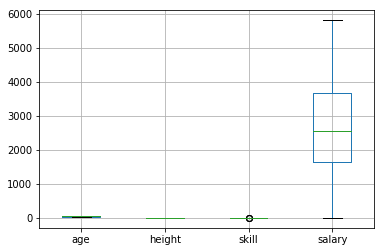

In [0]:
plot = pd.DataFrame.boxplot(df2)
print(plot)

```Save the result as a csv```

In [0]:
df3.to_csv('results.csv')

## Working with real-life data

```read the csv file entitled house_prices_numeric.csv consider writing the following line of code:```
```python
pd.options.display.max_columns=50
```

In [0]:
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns=50

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_numeric.csv')

```In the following questions, print your answer if possible, draw a graph or visualize it in any other means. When drawing a graph, add a title to it. Answer the following questions (try using a single line of code for each):```
```
- What is oldest house in the dataset (YearBuilt)?
- What is the highest price (SalePrice) of houses built in that year?
- What is the mean area (LotArea) of houses?
- What is the 50-percentile of the area (LotArea) of houses?
- What is more common: having a fireplace (Fireplaces) in the house, or not having one?
- What is the mean price (SalePrice) of houses that have swimming pools (PoolArea)?
- How many houses were sold every year (YrSold)? Draw a graph using plt.plot or pandas.plot
- What is the distribution of the overall condition of the houses (OverallCond)? Use plt.hist or pandas.hist
- For every number of fireplaces in a house (Fireplaces), compute the mean price of a house, the mean age of the house (we are in 2019) and the count of distinct FullBath values
- Take only houses with MSSubClass > 60. Split into groups according to whether or not the MSSubClass is a multiple of 20. For each group compute the mean, max, min and standard deviation of OverallQual
```

In [0]:
df.head(1)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500


In [0]:
print('oldest house')
oldest = df['YearBuilt'].min()
df[df['YearBuilt'] == oldest]

oldest house


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
1349,1350,70,50.0,5250,8,5,1872,1987,0.0,259,0,425,684,938,1215,205,2358,0,0,2,0,4,1,8,0,NaN,0,0,0,54,20,0,0,0,0,12,2008,122000


In [0]:
print('highest price for a house built in 1872')
df.groupby('YearBuilt')['SalePrice'].max()[oldest]

highest price for a house built in 1872


122000

In [0]:
print('average lot area')
df['LotArea'].mean()

average lot area


10516.828082191782

In [0]:
print('median lot area')
df['LotArea'].median()

median lot area


9478.5

In [0]:
have = len(df[df['Fireplaces'] > 0])
dont_have = len(df[df['Fireplaces'] == 0])
if have > dont_have:
  print('having a fireplace is more common')
else:
  print('not having a fireplace is more common')

having a fireplace is more common


In [0]:
print('average price for houses with a pool')
df[df['PoolArea'] > 0]['SalePrice'].mean()

average price for houses with a pool


288138.5714285714

Text(0.5,1,'number of Houses Sold per Year')

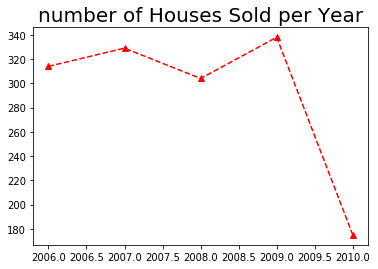

In [0]:
plt.plot(df.groupby('YrSold').size(), 'r^--')
plt.title('number of Houses Sold per Year', size=20)


Text(0.5,1,'overall house condition histogram')

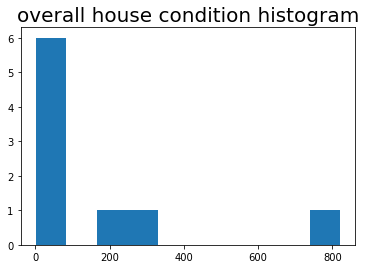

In [0]:
plt.hist(df.groupby('OverallCond').size())
plt.title('overall house condition histogram', size=20)


In [0]:
print('average price for houses by number of fire places')
df.groupby('Fireplaces')['SalePrice'].mean()

average price for houses by number of fire places


Fireplaces
0    141331.482609
1    211843.909231
2    240588.539130
3    252000.000000
Name: SalePrice, dtype: float64

In [0]:
print('average age for houses by number of fire places')
2019 - df.groupby('Fireplaces')['YearBuilt'].mean()

average age for houses by number of fire places


Fireplaces
0    54.781159
1    39.150769
2    54.347826
3    38.400000
Name: YearBuilt, dtype: float64

In [0]:
print('distinct full bath numbers by number of fire places')
df.groupby('Fireplaces')['FullBath'].nunique()

distinct full bath numbers by number of fire places


Fireplaces
0    4
1    4
2    4
3    2
Name: FullBath, dtype: int64

In [0]:
gb = df[df['MSSubClass'] > 60].groupby(df['MSSubClass'] % 20 == 0)

In [0]:
gb['OverallQual'].agg((np.mean, np.max, np.min, np.std))

,mean,amax,amin,std
MSSubClass,,,,
False,5.556180,10,3,1.193055
True,6.389908,9,4,1.111021


## Feature extraction

```Load the complete version of the houses table, entitled "house_prices_larger.csv"```

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_larger.csv')

```As you recall, the feature extraction process is done in order to let us describe the data in more "meaningful" manner. Add the following features to your dataframe:```
- ```LotArea in squared meters ( it's currently in units of squared feet)```
- ```1stFlrSF + 2ndFlrSF```
- ```GarageArea**0.5```
- ```LotArea / (BedroomAbvGr+1)```
- ```LotArea / (mean LotArea for houses built in that same year + 1e-5) - you might want to use``` [pandas merge function](https://www.google.com/search?q=pandas+merge&oq=pandas+merge&aqs=chrome..69i57l2j69i59l3j69i60.2080j0j9&sourceid=chrome&ie=UTF-8)
- ```Ranking of LotArea (largest house has 1, the second largest has 2 and so on)```
- ```One hot encoding of LotConfig - that is, add feature againts every value possible in LotConfig, which is 1 if the sample's LotConfig is this value and 0 otherwise (consider``` [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html))

```make a list of the names of the features you created.```

In [0]:
df.insert(0, 'LotAreaMetric', 0.092903 * df['LotArea'])

In [0]:
df.insert(0, 'ttlSF', df['1stFlrSF'] + df['2ndFlrSF'])

In [0]:
df.insert(0, 'GarageAreaSqrt', df['GarageArea'] ** 0.5)

In [0]:
df.insert(0, 'RoomArea', df['LotArea'] / (df['BedroomAbvGr'] + 1))

In [0]:
averages = df.groupby('YearBuilt')['LotArea'].mean() + 1e-5
df.insert(0, 'AreaComparedInYear', df['LotArea'] / np.array([averages[year] for year in df['YearBuilt']]))

In [0]:
df.insert(0, 'AreaRank', df['LotArea'].rank(method='dense'))

In [0]:
df = pd.get_dummies(df, columns=['LotConfig'])

In [0]:
df.head()

,AreaRank,AreaComparedInYear,RoomArea,GarageAreaSqrt,ttlSF,LotAreaMetric,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside
0,328.0,0.874874,2112.5,23.409400,1710,785.03035,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,0,0,1
1,499.0,1.043942,2400.0,21.447611,1262,891.86880,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,1,0,0
2,703.0,1.080951,2812.5,24.657656,1786,1045.15875,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,0,0,1
3,490.0,1.045441,2387.5,25.337719,1717,887.22365,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,1,0,0,0,0
4,926.0,1.739272,2852.0,28.913665,2198,1324.79678,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,0,0,1,0,0


In [0]:
features = ['LotAreaMetric','ttlSF','GarageAreaSqrt','RoomArea','AreaComparedInYear','AreaRank', 'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2',
            'LotConfig_FR3', 'LotConfig_Inside']

## Simple linear model

```Next, we will train a simple linear model, as seen in class, to predict SalePrice. Use the features you computed. Create train and test segments, normalize the data (both the features and the target) and use a linear model. Make sure you don't somehow use the test data when training your model (or when normalizing your data).```

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

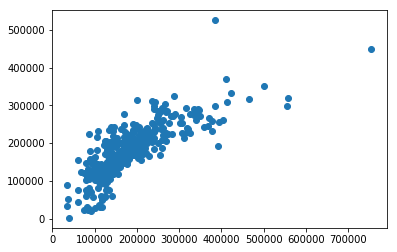

In [0]:
data = df[features]
targets = df['SalePrice']
x_train, x_test, y_train, y_test = train_test_split(data, targets, test_size=0.3)

StandardScaler(x_train)
StandardScaler(y_train)

lin_regressor = LinearRegression()
lin_regressor.fit(x_train, y_train) 

price_test_fit = lin_regressor.predict(x_test)
price = np.array(y_test)
price_model = np.array(price_test_fit)

plt.scatter(price,price_model)


```Next, we will add extra features: for any feature you computed earlier, add feature**2 and feature**3. Now use Ridge regression (regularized linear regression, as we discussed in class). Draw graphs of the loss computed on the train and on the validation as a function of the regularization parameter, for``` 1$\leq\alpha\leq$30. ```What regularization would it be best to take?```

In [0]:
from sklearn.linear_model import Ridge
df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_special.csv')

In [0]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_special.csv')

In [0]:
features = features[:6]

In [0]:
df.insert(0, 'LotAreaMetric', 0.092903 * df['LotArea'])
df.insert(0, 'ttlSF', df['1stFlrSF'] + df['2ndFlrSF'])
df.insert(0, 'GarageAreaSqrt', df['GarageArea'] ** 0.5)
df.insert(0, 'RoomArea', df['LotArea'] / (df['BedroomAbvGr'] + 1))
averages = df.groupby('YearBuilt')['LotArea'].mean() + 1e-5
df.insert(0, 'AreaComparedInYear', df['LotArea'] / np.array([averages[year] for year in df['YearBuilt']]))
df.insert(0, 'AreaRank', df['LotArea'].rank(method='dense'))

In [0]:
new_features = []
for feature in features:
  df.insert(0, r"{}^2".format(feature), df[feature] ** 2)
  df.insert(0, r"{}^3".format(feature), df[feature] ** 3)
  
  new_features.append(feature)
  new_features.append(r"{}^2".format(feature))
  new_features.append(r"{}^3".format(feature))

In [0]:
data = df[new_features]
targets = df["SalePrice"]

x_train, x_test, y_train, y_test = train_test_split(data, targets, test_size=0.3)

/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.40189e-29): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=8.80379e-29): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.32057e-28): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.76076e-28): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.20095e-28): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/ridge.py:125: LinAlgWarni

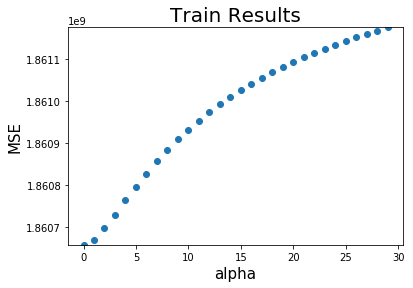

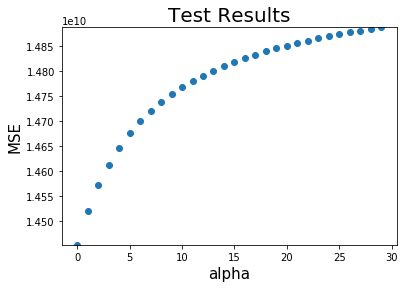

In [0]:
polynom = PolynomialFeatures(degree=1)

x_train_pol = polynom.fit_transform(x_train)
x_test_pol = polynom.fit_transform(x_test)
score_train = np.zeros(30)
score_test = np.zeros(30)

for i in range(30):
  ridge_reg = Ridge(alpha=i , max_iter = 10000)
  ridge_reg.fit(x_train_pol, y_train)
  price_train_fit = ridge_reg.predict(x_train_pol)
  price_test_fit = ridge_reg.predict(x_test_pol)
  score_train[i] = mean_squared_error(price_train_fit, y_train) # the loss function is mse
  score_test[i] = mean_squared_error(price_test_fit, y_test)
plt.scatter(range(30), score_train)
plt.ylim(np.min(score_train),np.max(score_train))
plt.title('Train Results', size=20)
plt.ylabel('MSE', size=15)
plt.xlabel('alpha', size=15)
plt.show()

plt.scatter(range(30), score_test)
plt.ylim(np.min(score_test),np.max(score_test))
plt.title('Test Results', size=20)
plt.ylabel('MSE', size=15)
plt.xlabel('alpha', size=15)
plt.show()

